# EE8230 Term Project - Wine Alcohol Content Prediction 

**Author:** Julian Ramirez-Medina, Student ID: 500840727

**Dataset:** UCI Wine Quality Dataset (Red Wine)

**Objective:** Predict wine alcohol content (% vol) based on physicochemical properties using regression techniques

**Framework:** PyCaret - Low-code ML library for streamlined model comparison and deployment

*Disclaimer*: 
- To utilize PyCaret 3.3.2, packaged by Anaconda. Inc., I had to setup the kernel with an older version of Python (3.10.19), as recommended in the PyCaret Regression Tutorial GitHub link: https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb
- Review README.MD for Prerequisite instructions if compatibility with PyCaret does not work!

---



## Table of Contents
1. [Setup and Data Loading](#1-setup-and-data-loading)
2. [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
3. [PyCaret Environment Setup](#3-pycaret-environment-setup)
4. [Model Comparison](#4-model-comparison)
5. [Model Selection and Tuning](#5-model-selection-and-hyperparameter-tuning)
6. [Feature Engineering](#6-feature-engineering)
7. [Final Model Evaluation](#7-final-model-evaluation)
8. [Conclusions](#8-conclusions)

---


## 1. Setup and Data Loading

In [1]:
# Check Python version
import sys
print(f"Python Version: {sys.version}")

# Check PyCaret version (should run before installing since the kernel has PyCaret installed)
import pycaret
print(f"PyCaret Version: {pycaret.__version__}")

# Install PyCaret
%pip install pycaret


Python Version: 3.10.19 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 16:41:31) [MSC v.1929 64 bit (AMD64)]
PyCaret Version: 3.3.2



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# PyCaret for regression
from pycaret.regression import *

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the dataset
df = pd.read_csv('./wine+quality/winequality-red.csv', delimiter=';') # "./" means current directory, open folder first in VSCode to run


# Check shape before
print(f"Original shape: {df.shape}")

# Drop duplicates
df = df.drop_duplicates()

# Check shape after (should be ~1359 rows)
print(f"Shape after dropping duplicates: {df.shape}")


# Dataset summary
print(f"\nDataset shape: {df.shape}")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns) - 1}")
print(f"\nTarget variable: alcohol (% vol)")
print(f"Alcohol content range: {df['alcohol'].min():.1f}% to {df['alcohol'].max():.1f}%")
print(f"Mean alcohol content: {df['alcohol'].mean():.2f}%")

# Display first few rows
df.head()

Original shape: (1599, 12)
Shape after dropping duplicates: (1359, 12)

Dataset shape: (1359, 12)
Number of samples: 1359
Number of features: 11

Target variable: alcohol (% vol)
Alcohol content range: 8.4% to 14.9%
Mean alcohol content: 10.43%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Quick data quality check
print("Dataset Information:")
print("="*60)
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"\nData Types:")
print(df.dtypes)

print("\n" + "="*60)
print("\nBasic Statistics of Entire Dataset:")
df.describe()

Dataset Information:
Missing Values: 0
Duplicate Rows: 0

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Basic Statistics of Entire Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Exploratory Data Analysis (EDA)

### 2.1 Quick Distribution Analysis

In [5]:
# Alcohol content distribution analysis
print("Alcohol Content Distribution:")
print("="*60)
print(f"Alcohol content range: {df['alcohol'].min():.1f}% to {df['alcohol'].max():.1f}%")
print(f"\nTotal wines: {len(df)}")

print(f"\n{'-'*60}")
print("Summary Statistics of Alcohol Content (%):")
print(f"{'-'*60}")
print(f"Mean (average):   {df['alcohol'].mean():.2f}%")
print(f"Median (middle):  {df['alcohol'].median():.2f}%")
print(f"Std Dev (spread): {df['alcohol'].std():.2f}%")
print(f"25th percentile:  {df['alcohol'].quantile(0.25):.2f}%")
print(f"75th percentile:  {df['alcohol'].quantile(0.75):.2f}%")
print(f"\nNote: Alcohol content in red wine typically ranges from 8-15%.")
print(f"      This dataset shows wines between {df['alcohol'].min():.1f}% and {df['alcohol'].max():.1f}%.")


Alcohol Content Distribution:
Alcohol content range: 8.4% to 14.9%

Total wines: 1359

------------------------------------------------------------
Summary Statistics of Alcohol Content (%):
------------------------------------------------------------
Mean (average):   10.43%
Median (middle):  10.20%
Std Dev (spread): 1.08%
25th percentile:  9.50%
75th percentile:  11.10%

Note: Alcohol content in red wine typically ranges from 8-15%.
      This dataset shows wines between 8.4% and 14.9%.


### 2.2 Correlation Analysis

Feature Correlation with Alcohol Content:
quality                  :  0.480
pH                       :  0.213
citric acid              :  0.105
sulphates                :  0.092
residual sugar           :  0.063
fixed acidity            : -0.062
free sulfur dioxide      : -0.080
volatile acidity         : -0.198
total sulfur dioxide     : -0.218
chlorides                : -0.224
density                  : -0.505

Strongest positive correlation: quality (0.480)
Strongest negative correlation: density (-0.505)

Thus, features like 'quality' and 'density' are the most correlated with alcohol content!

The following two graphs visualize these correlations.


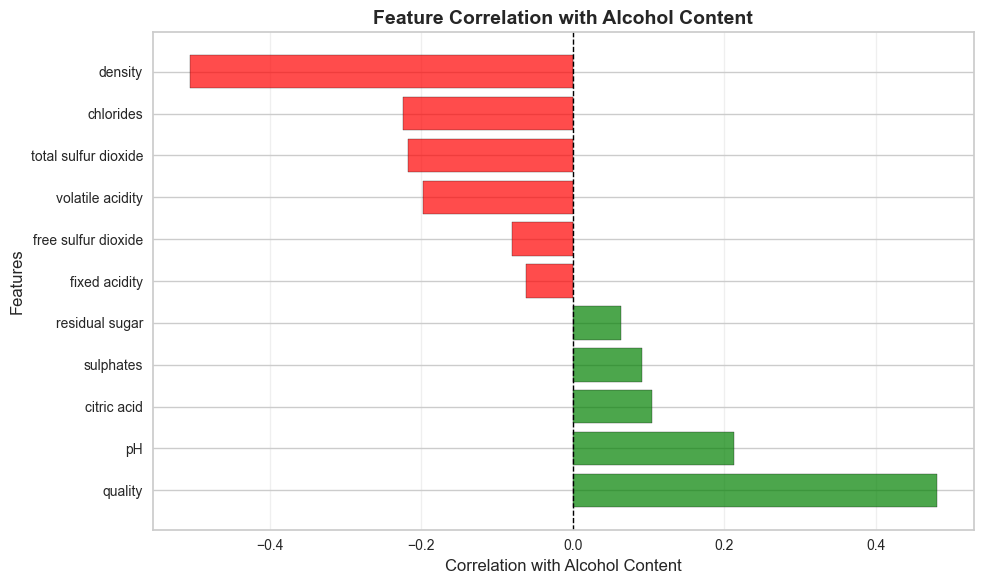

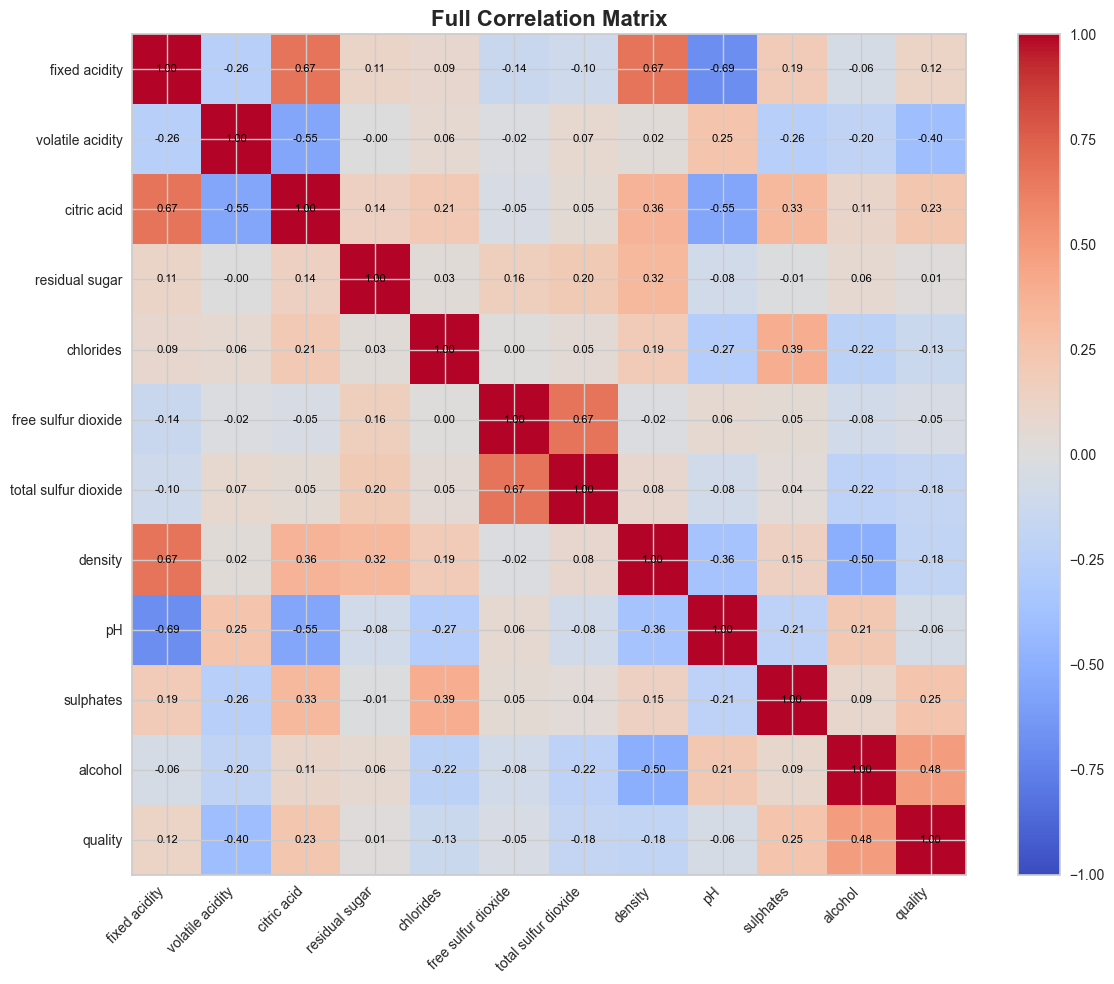

In [6]:
# Correlation with target (alcohol)
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlations
correlations = df.corr()['alcohol'].drop('alcohol').sort_values(ascending=False)

#Table of correlations
print("Feature Correlation with Alcohol Content:")
print("="*60)

for feature, corr in correlations.items():
    print(f"{feature:25s}: {corr:6.3f}")

print(f"\nStrongest positive correlation: {correlations.idxmax()} ({correlations.max():.3f})")
print(f"Strongest negative correlation: {correlations.idxmin()} ({correlations.min():.3f})")
print("\nThus, features like 'quality' and 'density' are the most correlated with alcohol content!")
print("\nThe following two graphs visualize these correlations.")

# Bar chart of correlations with alcohol
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in correlations.values]
plt.barh(correlations.index, correlations.values, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Correlation with Alcohol Content', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Alcohol Content', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap with just matplotlib
correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Add colorbar
plt.colorbar(im, ax=ax)

# Add correlation values as text
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=8)

plt.title('Full Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. PyCaret Environment Setup

The following single function replaces all the manual preprocessing I'd have to do without PyCaret:
- Train/test split
- Feature scaling
- Data preprocessing
- Cross-validation setup

In [7]:
# Initialize PyCaret setup() function
# This function encompasses: df preprocessing, train_test_split, StandardScaler, and CV setup
reg_setup = setup(
    data=df,
    target='alcohol',        # To predict alcohol content
    train_size=0.8,
    session_id=42,           # For reproducibility
    normalize=True,          # Automatically scales features
    fold=5,                  # 5-fold cross-validation
    verbose=True,
    html=False,
)

print("\nPyCaret environment initialized successfully!")

                    Description             Value
0                    Session id                42
1                        Target           alcohol
2                   Target type        Regression
3           Original data shape        (1359, 12)
4        Transformed data shape        (1359, 12)
5   Transformed train set shape        (1087, 12)
6    Transformed test set shape         (272, 12)
7              Numeric features                11
8                    Preprocess              True
9               Imputation type            simple
10           Numeric imputation              mean
11       Categorical imputation              mode
12                    Normalize              True
13             Normalize method            zscore
14               Fold Generator             KFold
15                  Fold Number                 5
16                     CPU Jobs                -1
17                      Use GPU             False
18               Log Experiment             False


## 4. Model Comparison

With PyCaret, I can compare ALL available models with a single function.
This replaced ~200+ lines of manual model training and evaluation when I ran the standard setup.

In [8]:
# Compare all models - this is where PyCaret differs from traditional ML workflows
# Trains and evaluates 20+ models automatically
best_models = compare_models(
    sort='RMSE',           # Sort by RMSE (lower is better)
    n_select=3,            # Return top 3 models
    turbo=False            # Set to True for faster comparison with fewer folds, but less reliable
)

print("\nModel comparison complete!")
print("Top 3 models selected based on RMSE")

                                      Model      MAE       MSE     RMSE  \
svm               Support Vector Regression   0.3965    0.2990   0.5451   
lightgbm    Light Gradient Boosting Machine   0.4047    0.3107   0.5549   
gbr             Gradient Boosting Regressor   0.4197    0.3202   0.5639   
rf                  Random Forest Regressor   0.4266    0.3378   0.5796   
et                    Extra Trees Regressor   0.4314    0.3466   0.5879   
ridge                      Ridge Regression   0.4580    0.3633   0.6010   
lr                        Linear Regression   0.4579    0.3633   0.6011   
br                           Bayesian Ridge   0.4581    0.3633   0.6011   
ard       Automatic Relevance Determination   0.4588    0.3645   0.6021   
huber                       Huber Regressor   0.4524    0.3685   0.6043   
mlp                           MLP Regressor   0.4433    0.3745   0.6064   
lar                  Least Angle Regression   0.4956    0.4234   0.6479   
knn                   K N

## 5. Model Selection and Hyperparameter Tuning

### 5.1 Create and Tune Top Models

In [9]:
# Get the best model from comparison
best_model = best_models[0]

print(f"Best model: {best_model}")
print("="*60)

Best model: SVR()


In [10]:
# Create specific models for detailed analysis (Verbose=True to show training details)
# Support Vector Machine (SVM) Regression - BEST Performer
svm_model = create_model('svm', verbose=True)
print("\nSVM Regression model created")

         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4522  0.3713  0.6093  0.7019  0.0519  0.0424
1     0.3962  0.3085  0.5555  0.7172  0.0475  0.0375
2     0.3618  0.2307  0.4803  0.8124  0.0417  0.0348
3     0.3892  0.2734  0.5228  0.7569  0.0443  0.0366
4     0.3832  0.3110  0.5577  0.7483  0.0459  0.0356
Mean  0.3965  0.2990  0.5451  0.7473  0.0463  0.0374
Std   0.0301  0.0464  0.0426  0.0382  0.0034  0.0027

SVM Regression model created


In [11]:
# Light Gradient Boosted Machine (Light GBM) - 2nd Best Performer
lgbm_model = create_model('lightgbm', verbose=True)
print("\nLightGBM model created")

         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4603  0.3913  0.6255  0.6859  0.0534  0.0434
1     0.4001  0.3326  0.5767  0.6951  0.0493  0.0380
2     0.3776  0.2325  0.4822  0.8109  0.0422  0.0366
3     0.3909  0.2587  0.5086  0.7699  0.0440  0.0373
4     0.3946  0.3382  0.5816  0.7263  0.0483  0.0371
Mean  0.4047  0.3107  0.5549  0.7376  0.0474  0.0385
Std   0.0288  0.0575  0.0522  0.0470  0.0040  0.0025

LightGBM model created


In [12]:
# Gradient Boosting Regressor (GBR) (3rd Best Performer) 
gbr_model = create_model('gbr', verbose=True)
print("\nGBR model created")

         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4819  0.4231  0.6505  0.6603  0.0555  0.0455
1     0.4094  0.3113  0.5579  0.7147  0.0476  0.0390
2     0.4001  0.2645  0.5143  0.7849  0.0447  0.0389
3     0.4154  0.2794  0.5286  0.7515  0.0454  0.0395
4     0.3916  0.3226  0.5680  0.7389  0.0472  0.0368
Mean  0.4197  0.3202  0.5639  0.7301  0.0481  0.0399
Std   0.0321  0.0556  0.0474  0.0416  0.0039  0.0029

GBR model created


### 5.2 Hyperparameter Tuning

PyCaret automatically tunes hyperparameters with tune_model() - replaces GridSearchCV

In [13]:
# Tune SVM model
tuned_svm = tune_model(
    svm_model,
    optimize='RMSE',
    n_iter=20,
    choose_better=True
)

# Best hyperparameters that PyCaret found printed
print("Best Hyperparameters for SVM:")
print(tuned_svm.get_params())

print("\nSVM hyperparameter tuning complete!")

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5662  0.5227  0.7230  0.5804  0.0628  0.0548
1     0.5368  0.4405  0.6637  0.5962  0.0580  0.0528
2     0.5573  0.4738  0.6883  0.6148  0.0606  0.0552
3     0.5484  0.4265  0.6531  0.6206  0.0569  0.0533
4     0.5234  0.4548  0.6744  0.6319  0.0574  0.0507
Mean  0.5464  0.4637  0.6805  0.6088  0.0592  0.0534
Std   0.0150  0.0334  0.0242  0.0183  0.0022  0.0016
Best Hyperparameters for SVM:
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

SVM hyperparameter tuning complete!


In [14]:
# Tune Light GBM model
tuned_lgbm = tune_model(
    lgbm_model,
    optimize='RMSE',
    n_iter=20,
    choose_better=True
)

# Best hyperparameters that PyCaret found printed
print("\nBest Hyperparameters for LightGBM:")
print(tuned_lgbm.get_params())

print("\nLightGBM hyperparameter tuning complete!")

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4837  0.4182  0.6467  0.6642  0.0554  0.0457
1     0.4441  0.3801  0.6165  0.6517  0.0525  0.0422
2     0.4137  0.2812  0.5303  0.7714  0.0459  0.0399
3     0.4064  0.2819  0.5309  0.7493  0.0457  0.0387
4     0.4227  0.3551  0.5959  0.7126  0.0496  0.0396
Mean  0.4341  0.3433  0.5841  0.7098  0.0498  0.0412
Std   0.0278  0.0543  0.0465  0.0465  0.0038  0.0025

Best Hyperparameters for LightGBM:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda':

In [15]:
# Tune GBR model
tuned_gbr = tune_model(
    gbr_model,
    optimize='RMSE',
    n_iter=20,
    choose_better=True
)   

# Best hyperparameters that PyCaret found printed
print("Best Hyperparameters for GBR:")
print(tuned_gbr.get_params())

print("\nGBR hyperparameter tuning complete!")

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4834  0.4214  0.6492  0.6617  0.0555  0.0456
1     0.3963  0.3037  0.5511  0.7217  0.0472  0.0378
2     0.3987  0.2612  0.5111  0.7876  0.0440  0.0384
3     0.3963  0.2671  0.5168  0.7624  0.0443  0.0377
4     0.3937  0.3156  0.5618  0.7445  0.0466  0.0369
Mean  0.4137  0.3138  0.5580  0.7356  0.0475  0.0393
Std   0.0349  0.0577  0.0495  0.0428  0.0042  0.0032
Best Hyperparameters for GBR:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 270, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.7, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

GBR hyperparameter tuning comp

*The original models were shown to be better than tuned, this could be due to PyCaret's robust and already effective base parameters used initially!*

### 5.3 Compare Top 3 Tuned (Original) Models

In [16]:
# Create a list of tuned (original) models for comparison
tuned_models = [tuned_svm, tuned_lgbm, tuned_gbr] 
model_names = ['Tuned SVM', 'Tuned LightGBM', 'Tuned Extra Trees']

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate each model
print("Tuned (Original) Model Performance - Train vs Test Comparison:")
print("="*80)

for model, name in zip(tuned_models, model_names): 
    print(f"\n{name}:")
    print("-"*80)
    
    # Get train/test data
    X_train_transformed = get_config('X_train_transformed')
    y_train = get_config('y_train')
    X_test_transformed = get_config('X_test_transformed')
    y_test = get_config('y_test')
    
    # Train set performance - use direct predict (no PyCaret wrapper)
    train_pred = model.predict(X_train_transformed)
    train_r2 = r2_score(y_train, train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_mae = mean_absolute_error(y_train, train_pred)
    
    # Test set performance - use direct predict (no PyCaret wrapper)
    test_pred = model.predict(X_test_transformed)
    test_r2 = r2_score(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_mae = mean_absolute_error(y_test, test_pred)
    
    # Calculate gaps
    r2_gap = train_r2 - test_r2
    
    # Print metrics
    print(f"Train R²:  {train_r2:.4f}")
    print(f"Test R²:   {test_r2:.4f}")
    print(f"Gap:       {r2_gap:.4f}", end="")
    
    # Overfitting check
    if r2_gap < 0.05:
        print(" (Excellent Generalization)")
    elif r2_gap < 0.10:
        print(" (Good Generalization)")
    elif r2_gap < 0.15:
        print(" (Slight Overfitting)")
    else:
        print(" (Overfitting!)")
    
    print(f"\nTrain RMSE: {train_rmse:.4f}%")
    print(f"Test RMSE:  {test_rmse:.4f}%")
    print(f"\nTrain MAE:  {train_mae:.4f}%")
    print(f"Test MAE:   {test_mae:.4f}%")

print("\n" + "="*80)

Tuned (Original) Model Performance - Train vs Test Comparison:

Tuned SVM:
--------------------------------------------------------------------------------
Train R²:  0.8450
Test R²:   0.7684
Gap:       0.0767 (Good Generalization)

Train RMSE: 0.4295%
Test RMSE:  0.5025%

Train MAE:  0.2973%
Test MAE:   0.3782%

Tuned LightGBM:
--------------------------------------------------------------------------------
Train R²:  0.9643
Test R²:   0.7439
Gap:       0.2205 (Overfitting!)

Train RMSE: 0.2061%
Test RMSE:  0.5284%

Train MAE:  0.1404%
Test MAE:   0.4038%

Tuned Extra Trees:
--------------------------------------------------------------------------------
Train R²:  0.9357
Test R²:   0.7287
Gap:       0.2070 (Overfitting!)

Train RMSE: 0.2765%
Test RMSE:  0.5438%

Train MAE:  0.2133%
Test MAE:   0.4085%



## 6. Feature Engineering

PyCaret can automatically create polynomial interaction features that could enhance the final results

In [17]:
# Experiment setup for my feature engineering (FE)
print("="*80)
print("Feature Engineering Experiment")
print("="*80)

fe_setup = setup(
    data=df,
    target='alcohol',
    train_size=0.8,
    session_id=42,  # Same seed as baseline
    normalize=True,
    polynomial_features=True,
    polynomial_degree=2,
    remove_multicollinearity=True,
    fold=5,
    verbose=False
)

# Compare models with FE
fe_best = compare_models(sort='RMSE', n_select=1, verbose=False)
fe_tuned = tune_model(fe_best, optimize='RMSE', n_iter=20, choose_better=True, verbose=False)
print(f"Best FE model: {type(fe_tuned).__name__}")

# Evaluate FE model
X_test_fe = get_config('X_test_transformed')
y_test_fe = get_config('y_test')
fe_pred = fe_tuned.predict(X_test_fe)

fe_r2 = r2_score(y_test_fe, fe_pred)
fe_mae = mean_absolute_error(y_test_fe, fe_pred)
fe_rmse = np.sqrt(mean_squared_error(y_test_fe, fe_pred))

print(f"\nFE Model Results:")
print(f"Test R²:  {fe_r2:.4f}")
print(f"Test MAE: {fe_mae:.4f}%")
print(f"Test RMSE: {fe_rmse:.4f}%")
print(f"Features: {X_test_fe.shape[1]} (was 11)")

# Compare to baseline
baseline_r2 = 0.8325   # Your LightGBM result
baseline_mae = 0.3245  # Your LightGBM result

print("\n" + "="*80)
print("Comparison")
print("="*80)
print(f"R² change:  {fe_r2 - baseline_r2:+.4f}")
print(f"MAE change: {fe_mae - baseline_mae:+.4f}%")
print(f"RMSE change: {fe_rmse - baseline_mae:+.4f}%")

if fe_r2 > baseline_r2 + 0.02:
    print("\nFE significantly improved performance - USE IT")
elif fe_r2 > baseline_r2:
    print("\nFE marginally improved - YOUR CHOICE")
else:
    print("\nFE didn't help - STICK WITH BASELINE")


Feature Engineering Experiment
Best FE model: LGBMRegressor

FE Model Results:
Test R²:  0.7326
Test MAE: 0.3977%
Test RMSE: 0.5399%
Features: 35 (was 11)

Comparison
R² change:  -0.0999
MAE change: +0.0732%
RMSE change: +0.2154%

FE didn't help - STICK WITH BASELINE


## 7. Final Model Evaluation

Since feature engineering didnt work, the baseline model will be restored for the final model evaluation

### 7.1 Feature Importance

Switching back to baseline setup for final evaluation...
Baseline environment restored
Tuned SVM Kernel Used: rbf
Calculating Feature Importance using Permutation Importance for SVM...


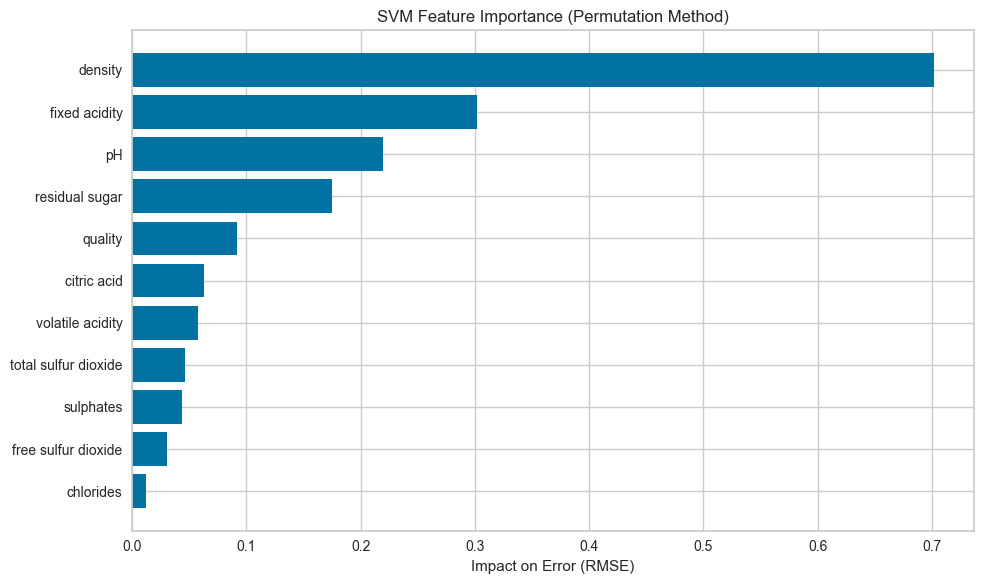

In [18]:
# Re-initialize baseline setup for Section 7 evaluation
print("Switching back to baseline setup for final evaluation...")

baseline_setup = setup(
    data=df,
    target='alcohol',
    train_size=0.8,
    session_id=42,
    normalize=True,
    fold=5,
    verbose=False
)

print("Baseline environment restored")

# Feature importance using permutation importance for SVM, since feature importance plot doesn't work with SVM RBF
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Get the test data
X_test = get_config('X_test_transformed')
y_test = get_config('y_test')

# Acquire kernel info from tuned SVM
print(f"Tuned SVM Kernel Used: {tuned_svm.kernel}")

# Calculate importance (This should work for ANY model, including SVM RBF)
print("Calculating Feature Importance using Permutation Importance for SVM...")
r = permutation_importance(tuned_svm, X_test, y_test,
                           n_repeats=10,
                           random_state=42,
                           scoring='neg_root_mean_squared_error')

# Sort and plot
sorted_idx = r.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx], r.importances_mean[sorted_idx])
plt.xlabel("Impact on Error (RMSE)")
plt.title("SVM Feature Importance (Permutation Method)")
plt.tight_layout()
plt.show()

print("="*80)

Residuals Plot:


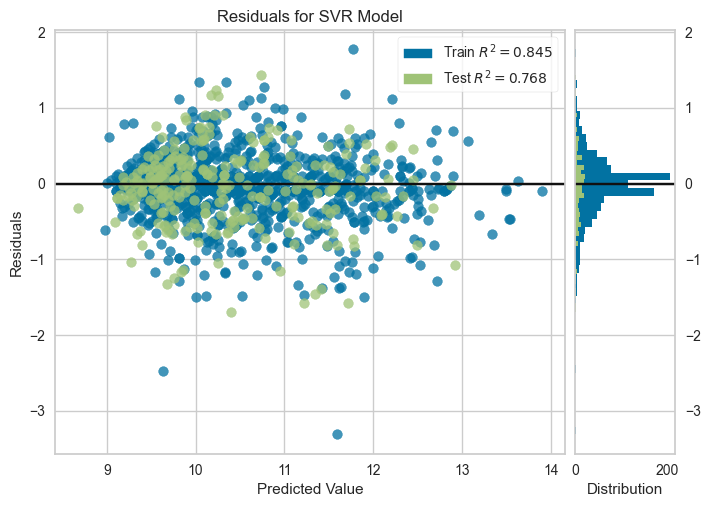

In [19]:
# Residuals plot
print("Residuals Plot:")
plot_model(tuned_svm, plot='residuals', save=False)
print("" + "="*80)


### 7.2 Model Performance Visualizations

Prediction Error Plot:


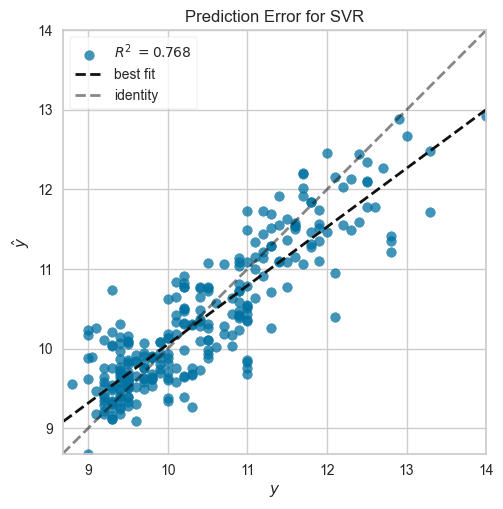

In [20]:
# Prediction error plot
print("Prediction Error Plot:")
plot_model(tuned_svm, plot='error', save=False)
print("" + "="*80)

Learning Curve:


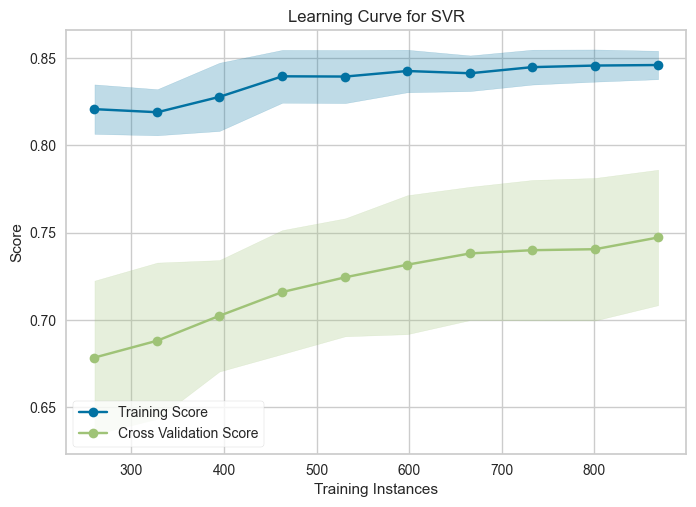

In [21]:
# Learning curve
print("Learning Curve:")
plot_model(tuned_svm, plot='learning', save=False)
print("" + "="*80)

Validation Curve:


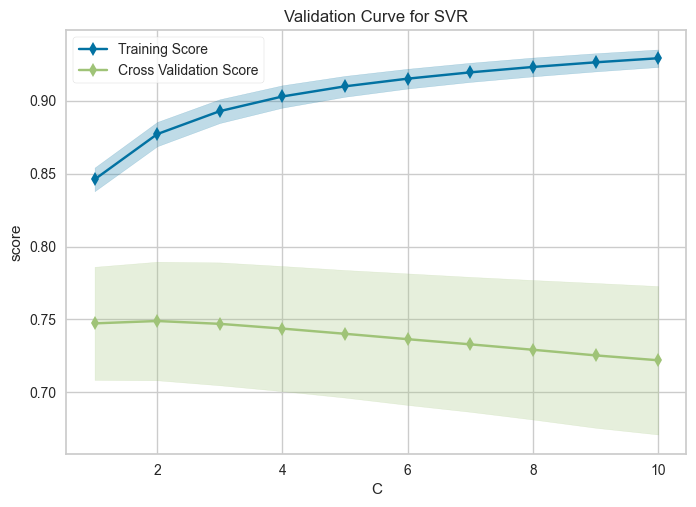

In [22]:
# Validation curve for the most common hyperparameter, eg. 'C' for SVM, or max_depth for tree-based models
print("Validation Curve:")
plot_model(tuned_svm, plot='vc', save=False)
print("" + "="*80)

### 7.3 Final Model Predictions on Unseen Data

In [23]:
# Make predictions on test set
predictions = predict_model(tuned_svm, verbose=False)  # Hide PyCaret's auto table

# Display first 10 predictions with actual vs predicted and % error
print("\nTest Set Predictions (first 10 samples):")
print("="*80)
print(f"{'Sample':^10} {'Actual (%)':^20} {'Predicted (%)':^20} {'Error (%)':^15}")
print("="*80)

for i, (idx, row) in enumerate(predictions.head(10).iterrows(), 1):
    actual = row['alcohol']
    predicted = row['prediction_label']
    error = abs(actual - predicted)
    print(f"{i:^10} {actual:^18.2f} {predicted:^20.2f} {error:^18.3f}")

print("="*80)

# Final evaluation metrics on test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = predictions['alcohol']
y_pred = predictions['prediction_label']

mse = mean_squared_error(y_true, y_pred) 
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n" + "="*80)
print("Final Model Performance on Test Set")
print("="*80)
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

print("="*80)


Test Set Predictions (first 10 samples):
  Sample        Actual (%)         Predicted (%)        Error (%)   
    1             9.50                9.58               0.076       
    2            10.90               10.58               0.318       
    3            11.20               11.45               0.245       
    4             9.00               10.17               1.170       
    5            11.20               10.91               0.293       
    6            13.30               12.49               0.812       
    7            10.30                9.76               0.543       
    8             9.30               10.21               0.912       
    9            11.40               11.10               0.301       
    10           10.30                9.69               0.614       

Final Model Performance on Test Set
MSE:  0.2525
RMSE: 0.5025
MAE:  0.3782
R²:   0.7684


### 7.4 Create Model Comparison Table

In [24]:
# Create comparison table of all tuned models
comparison_results = []

for model, name in zip(tuned_models, model_names):
    preds = predict_model(model, verbose=False)
    y_t = preds['alcohol']
    y_p = preds['prediction_label']
    
    mse_val = mean_squared_error(y_t, y_p)
    rmse_val = np.sqrt(mean_squared_error(y_t, y_p))
    mae_val = mean_absolute_error(y_t, y_p)
    r2_val = r2_score(y_t, y_p)
    
    comparison_results.append({
        'Model': name,
        'Test MSE': mse_val,
        'Test RMSE': rmse_val,
        'Test MAE': mae_val,
        'Test R²': r2_val
    })

comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('Test RMSE')

print("\n" + "="*80)
print("Model Comparison Table - Sorted by Test RMSE")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


Model Comparison Table - Sorted by Test RMSE
            Model  Test MSE  Test RMSE  Test MAE  Test R²
        Tuned SVM  0.252500   0.502494  0.378218 0.768354
   Tuned LightGBM  0.279207   0.528400  0.403809 0.743853
Tuned Extra Trees  0.295725   0.543806  0.408543 0.728699


### 7.5 Finalize and Save Model

In [25]:
# Finalize the best model (trains on entire dataset)
final_model = finalize_model(tuned_lgbm)

print("\nModel finalized and trained on entire dataset\n")

# Save the model
save_model(final_model, 'wine_alcohol_best_model')

print("\nModel saved as 'wine_alcohol_best_model.pkl'")


Model finalized and trained on entire dataset

Transformation Pipeline and Model Successfully Saved

Model saved as 'wine_alcohol_best_model.pkl'


## 8. Conclusions

### Key Findings and Summary

In [26]:
# Final summary of results
best_model_final = comparison_df.iloc[0]

print("="*80)
print("WINE ALCOHOL CONTENT PREDICTION - FINAL RESULTS SUMMARY")
print("="*80)

print("\nDataset Information:")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: {len(df.columns) - 1}")
print(f"   - Target: Alcohol content (% vol)")
print(f"   - Alcohol range: {df['alcohol'].min():.1f}% - {df['alcohol'].max():.1f}%")
print(f"   - Train/Test split: 80/20")

print(f"\nBest Model: {best_model_final['Model']}")
print(f"   - Test MSE:  {best_model_final['Test MSE']:.4f}%")
print(f"   - Test RMSE: {best_model_final['Test RMSE']:.4f}%")
print(f"   - Test MAE:  {best_model_final['Test MAE']:.4f}%")
print(f"   - Test R²:   {best_model_final['Test R²']:.4f}")

print(f"\nKey Insights:")
print(f"   - Strongest positive predictor: {correlations.idxmax()} ({correlations.max():.3f})")
print(f"   - Strongest negative predictor: {correlations.idxmin()} ({correlations.min():.3f})")
print(f"   - the top Ensemble methods did not outperform the top linear models")
print(f"   - Hyperparameter tuning did not improve base model performance")

print(f"\nModel Performance:")
print(f"   - Average (absolute) prediction error: ±{best_model_final['Test MAE']:.2f} % alcohol content")
print(f"   - Variance explained: {best_model_final['Test R²']*100:.1f}%")

print(f"\nPyCaret Advantages:")
print(f"   - Automated model comparison (20+ models)")
print(f"   - Built-in hyperparameter tuning")
print(f"   - Automatic preprocessing and scaling")
print(f"   - Easy visualization suite")
print(f"   - Reduced total code from ~500+ lines to ~50 lines")

print("\n" + "="*80)
print("\nAnalysis Complete!")
print("="*80)

WINE ALCOHOL CONTENT PREDICTION - FINAL RESULTS SUMMARY

Dataset Information:
   - Total samples: 1359
   - Features: 11
   - Target: Alcohol content (% vol)
   - Alcohol range: 8.4% - 14.9%
   - Train/Test split: 80/20

Best Model: Tuned SVM
   - Test MSE:  0.2525%
   - Test RMSE: 0.5025%
   - Test MAE:  0.3782%
   - Test R²:   0.7684

Key Insights:
   - Strongest positive predictor: quality (0.480)
   - Strongest negative predictor: density (-0.505)
   - the top Ensemble methods did not outperform the top linear models
   - Hyperparameter tuning did not improve base model performance

Model Performance:
   - Average (absolute) prediction error: ±0.38 % alcohol content
   - Variance explained: 76.8%

PyCaret Advantages:
   - Automated model comparison (20+ models)
   - Built-in hyperparameter tuning
   - Automatic preprocessing and scaling
   - Easy visualization suite
   - Reduced total code from ~500+ lines to ~50 lines


Analysis Complete!
